In [1]:
pip install pandas networkx matplotlib openpyxl

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

## México 1995

In [3]:
# Path to the Excel file
excel_file = 'mx95.xlsx'

In [5]:
# Initialize a list to hold the graphs
graphs = []

In [7]:
# Read each sheet and create a graph
for i in range(1, 6):  # Assuming sheets are named 'Sheet1' through 'Sheet5'
    # Read the matrix from the sheet
    # Assuming the first row and first column include the labels
    df = pd.read_excel(excel_file, sheet_name=f'Sheet{i}', header=0, index_col=0)

    print(f"Sheet {i} loaded with shape {df.shape}")
    print("Indices and columns:", df.index.tolist(), df.columns.tolist())

    # Validate the DataFrame shape
    if df.shape[0] != df.shape[1]:
        print(f"Error: DataFrame for Sheet{i} is not square. Shape is {df.shape}")
        continue  # Skip this iteration if the DataFrame is not square

    # Convert DataFrame to a NetworkX graph
    try:
        G = nx.from_pandas_adjacency(df.astype(bool), create_using=nx.DiGraph())
        graphs.append(G)
    except Exception as e:
        print(f"Failed to create a graph for Sheet{i}: {str(e)}")

Sheet 1 loaded with shape (44, 44)
Indices and columns: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44] [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44]
Sheet 2 loaded with shape (44, 44)
Indices and columns: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44] [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44]
Sheet 3 loaded with shape (44, 44)
Indices and columns: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 

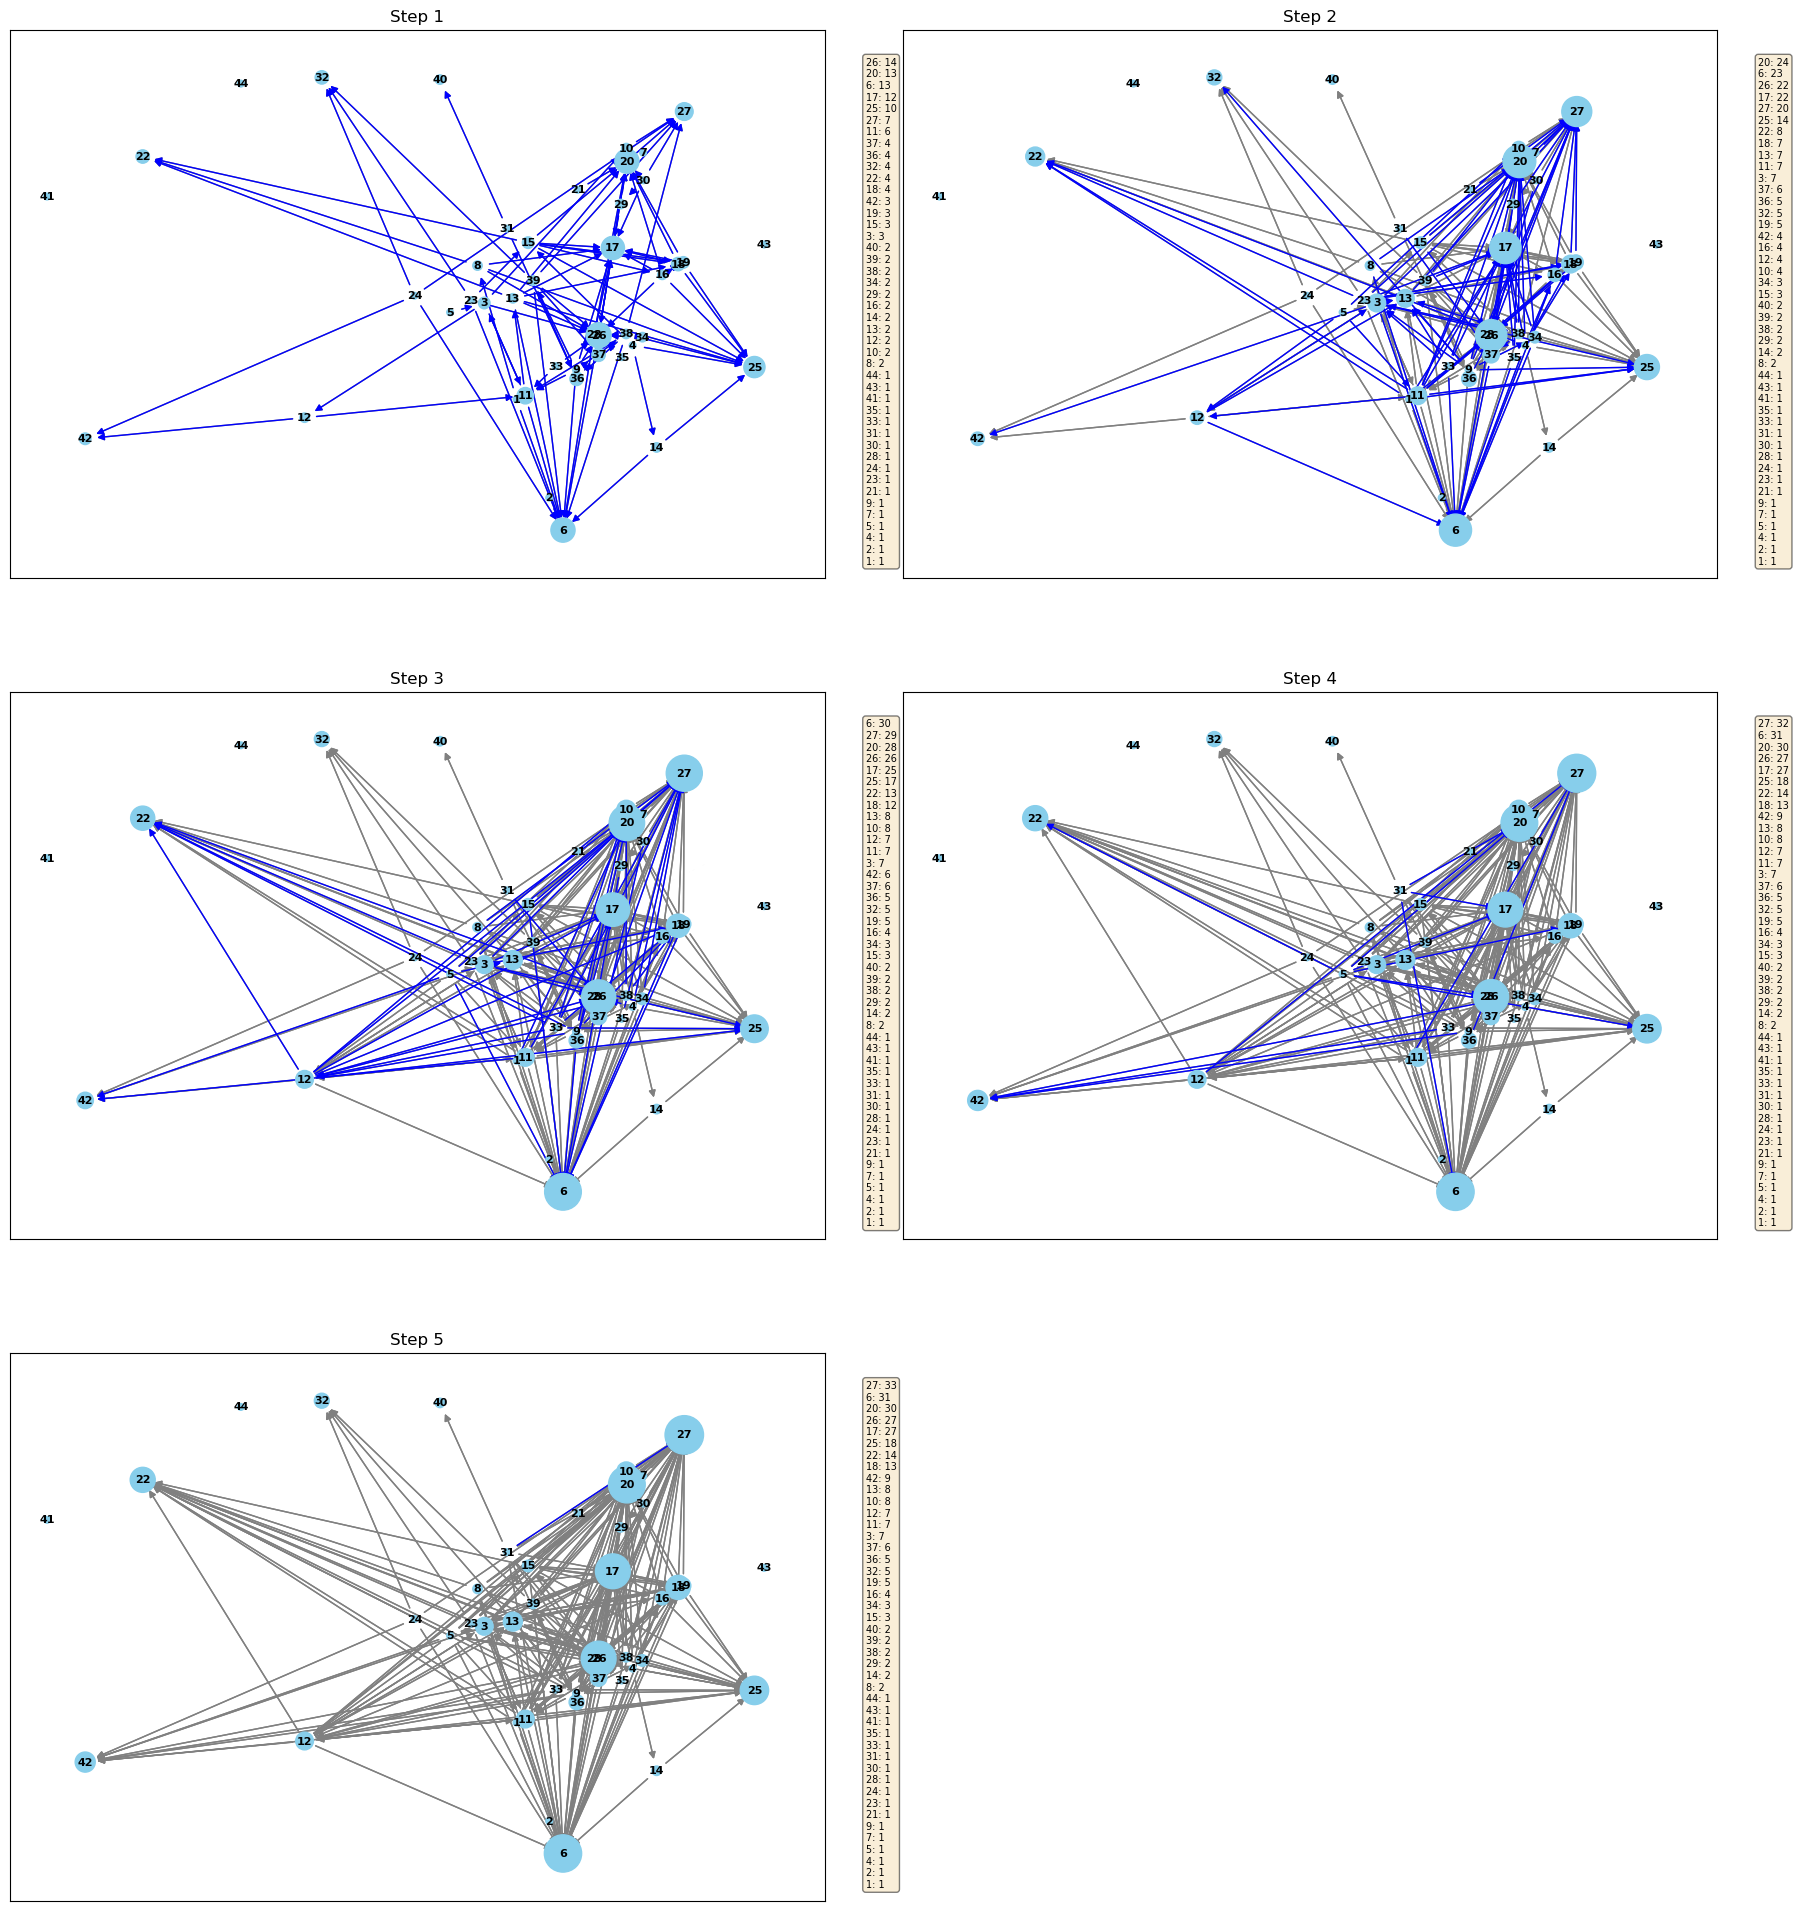

In [9]:
def draw_graphs(graphs):
    # Set up the figure size
    plt.figure(figsize=(18, 20))  # Slightly wider to accommodate the sidebar

    # Plot each graph
    for i, graph in enumerate(graphs, 1):
        ax = plt.subplot(3, 2, i)
        # Calculate fixed positions for all nodes
        pos = nx.spring_layout(graphs[0], seed=42)  # Using the first graph to define initial positions
        
        # Calculate fixed positions for all nodes using Kamada-Kawai layout
        #pos = nx.kamada_kawai_layout(graph)

        # Check for isolated nodes and adjust their positions if necessary
        for node, degree in graph.degree():
            if degree == 0:  # Node is isolated
                pos[node] = (1, 1)  # Move isolated nodes to a visible position

        # Calculate the raw in-degree for each node
        in_degrees = dict(graph.in_degree())
        # Scale the in-degree values for node size: multiply by 100 for visibility (adjust scale as needed)
        node_sizes = [in_degrees[node] * 100 for node in graph.nodes()]
        
        # Calculate the normalized in-degree centrality for each node
        in_degree_centrality = nx.in_degree_centrality(graph)
        # Scale the in-degree values for node size: multiply by 1000 for visibility
        node_sizes2 = [in_degree_centrality[node] * 1000 for node in graph.nodes()]

        # Draw the nodes, with size based on raw in-degree
        nx.draw_networkx_nodes(graph, pos, node_color='skyblue', node_size=node_sizes2)
        
        # Draw the labels
        nx.draw_networkx_labels(graph, pos, font_size=8, font_weight='bold')

        # Draw edges, excluding self-loops, with appropriate styling
        edges = [(u, v) for u, v in graph.edges() if u != v]
        nx.draw_networkx_edges(graph, pos, edgelist=edges, width=1, edge_color='grey', arrowstyle='-|>', arrowsize=10)

        # For edges, we need to determine which are new, and exclude self-loops
        if i > 1:
            # Get the set of edges from the previous graph excluding self-loops
            previous_edges = set((u, v) for u, v in graphs[i-2].edges() if u != v)
            current_edges = set((u, v) for u, v in graph.edges() if u != v)
            new_edges = current_edges - previous_edges
            old_edges = current_edges & previous_edges
            # Draw old edges with grey color
            nx.draw_networkx_edges(graph, pos, edgelist=list(old_edges), width=1, edge_color='grey', arrowstyle='-|>', arrowsize=10)
            # Draw new edges with blue color
            nx.draw_networkx_edges(graph, pos, edgelist=list(new_edges), width=1, edge_color='blue', arrowstyle='-|>', arrowsize=10)
        else:
            # For the first graph, exclude self-loops, and all edges are new
            first_graph_edges = [(u, v) for u, v in graph.edges() if u != v]
            nx.draw_networkx_edges(graph, pos, edgelist=first_graph_edges, edge_color='blue', width=1, arrowstyle='-|>', arrowsize=10)

        # Add a text box with raw in-degree values, sorted in descending order
        sorted_nodes = sorted(in_degrees.items(), key=lambda item: item[1], reverse=True)
        textstr = '\n'.join([f'{node}: {count}' for node, count in sorted_nodes])
        props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
        ax.text(1.05, 0.95, textstr, transform=ax.transAxes, fontsize=7,
                verticalalignment='top', bbox=props)

        plt.title(f'Step {i}')

    plt.tight_layout()
    plt.show()

# Draw the graphs
draw_graphs(graphs)

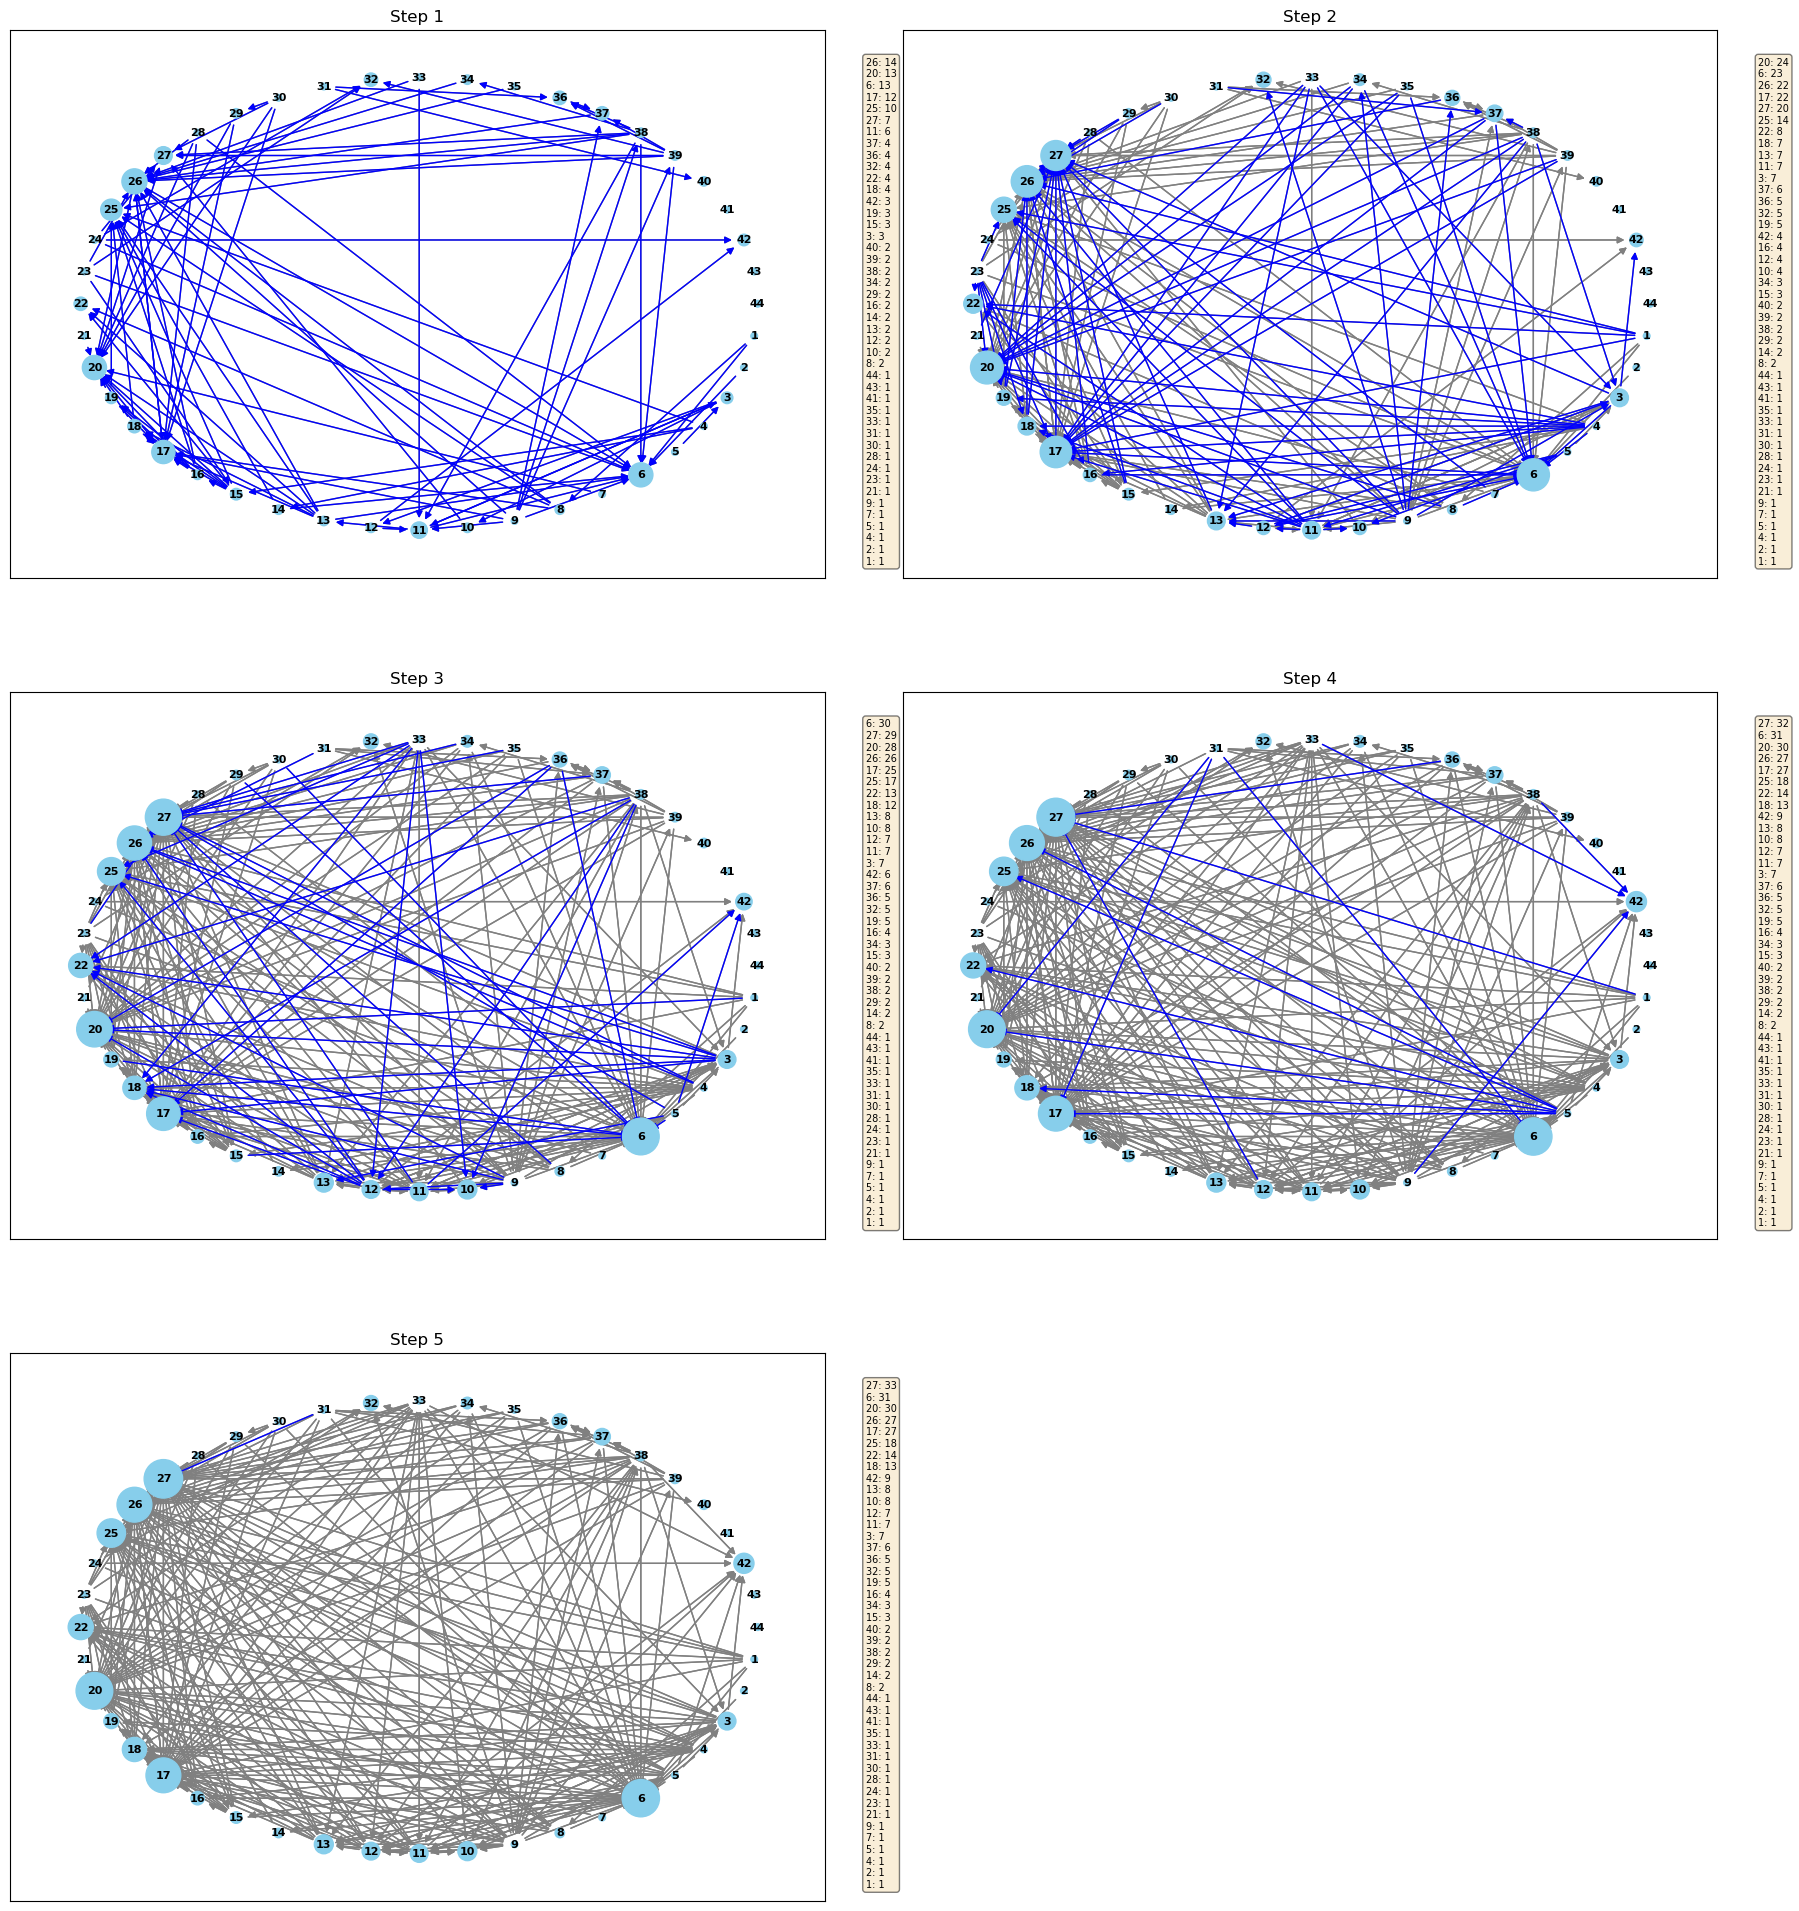

In [10]:
def draw_graphs(graphs):
    # Set up the figure size
    plt.figure(figsize=(18, 20))  # Slightly wider to accommodate the sidebar

    # Plot each graph
    for i, graph in enumerate(graphs, 1):
        ax = plt.subplot(3, 2, i)
        # Calculate fixed positions for all nodes
        pos = nx.circular_layout(graphs[0])  # Use circular layout to maintain consistent positions
        
        # Calculate fixed positions for all nodes using Kamada-Kawai layout
        #pos = nx.kamada_kawai_layout(graph)

        # Check for isolated nodes and adjust their positions if necessary
        for node, degree in graph.degree():
            if degree == 0:  # Node is isolated
                pos[node] = (1, 1)  # Move isolated nodes to a visible position

        # Calculate the raw in-degree for each node
        in_degrees = dict(graph.in_degree())
        # Scale the in-degree values for node size: multiply by 100 for visibility (adjust scale as needed)
        node_sizes = [in_degrees[node] * 100 for node in graph.nodes()]
        
        # Calculate the normalized in-degree centrality for each node
        in_degree_centrality = nx.in_degree_centrality(graph)
        # Scale the in-degree values for node size: multiply by 1000 for visibility
        node_sizes2 = [in_degree_centrality[node] * 1000 for node in graph.nodes()]

        # Draw the nodes, with size based on raw in-degree
        nx.draw_networkx_nodes(graph, pos, node_color='skyblue', node_size=node_sizes2)
        
        # Draw the labels
        nx.draw_networkx_labels(graph, pos, font_size=8, font_weight='bold')

        # Draw edges, excluding self-loops, with appropriate styling
        edges = [(u, v) for u, v in graph.edges() if u != v]
        nx.draw_networkx_edges(graph, pos, edgelist=edges, width=1, edge_color='grey', arrowstyle='-|>', arrowsize=10)

        # For edges, we need to determine which are new, and exclude self-loops
        if i > 1:
            # Get the set of edges from the previous graph excluding self-loops
            previous_edges = set((u, v) for u, v in graphs[i-2].edges() if u != v)
            current_edges = set((u, v) for u, v in graph.edges() if u != v)
            new_edges = current_edges - previous_edges
            old_edges = current_edges & previous_edges
            # Draw old edges with grey color
            nx.draw_networkx_edges(graph, pos, edgelist=list(old_edges), width=1, edge_color='grey', arrowstyle='-|>', arrowsize=10)
            # Draw new edges with blue color
            nx.draw_networkx_edges(graph, pos, edgelist=list(new_edges), width=1, edge_color='blue', arrowstyle='-|>', arrowsize=10)
        else:
            # For the first graph, exclude self-loops, and all edges are new
            first_graph_edges = [(u, v) for u, v in graph.edges() if u != v]
            nx.draw_networkx_edges(graph, pos, edgelist=first_graph_edges, edge_color='blue', width=1, arrowstyle='-|>', arrowsize=10)

        # Add a text box with raw in-degree values, sorted in descending order
        sorted_nodes = sorted(in_degrees.items(), key=lambda item: item[1], reverse=True)
        textstr = '\n'.join([f'{node}: {count}' for node, count in sorted_nodes])
        props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
        ax.text(1.05, 0.95, textstr, transform=ax.transAxes, fontsize=7,
                verticalalignment='top', bbox=props)

        plt.title(f'Step {i}')

    plt.tight_layout()
    plt.show()

# Draw the graphs
draw_graphs(graphs)

## México 2020

In [15]:
# Path to the Excel file
excel_file = 'mx20.xlsx'

In [17]:
# Initialize a list to hold the graphs
graphs = []

In [19]:
# Read each sheet and create a graph
for i in range(1, 6):  # Assuming sheets are named 'Sheet1' through 'Sheet5'
    # Read the matrix from the sheet
    # Assuming the first row and first column include the labels
    df = pd.read_excel(excel_file, sheet_name=f'Sheet{i}', header=0, index_col=0)

    print(f"Sheet {i} loaded with shape {df.shape}")
    print("Indices and columns:", df.index.tolist(), df.columns.tolist())

    # Validate the DataFrame shape
    if df.shape[0] != df.shape[1]:
        print(f"Error: DataFrame for Sheet{i} is not square. Shape is {df.shape}")
        continue  # Skip this iteration if the DataFrame is not square

    # Convert DataFrame to a NetworkX graph
    try:
        G = nx.from_pandas_adjacency(df.astype(bool), create_using=nx.DiGraph())
        graphs.append(G)
    except Exception as e:
        print(f"Failed to create a graph for Sheet{i}: {str(e)}")

Sheet 1 loaded with shape (44, 44)
Indices and columns: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44] [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44]
Sheet 2 loaded with shape (44, 44)
Indices and columns: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44] [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44]
Sheet 3 loaded with shape (44, 44)
Indices and columns: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 

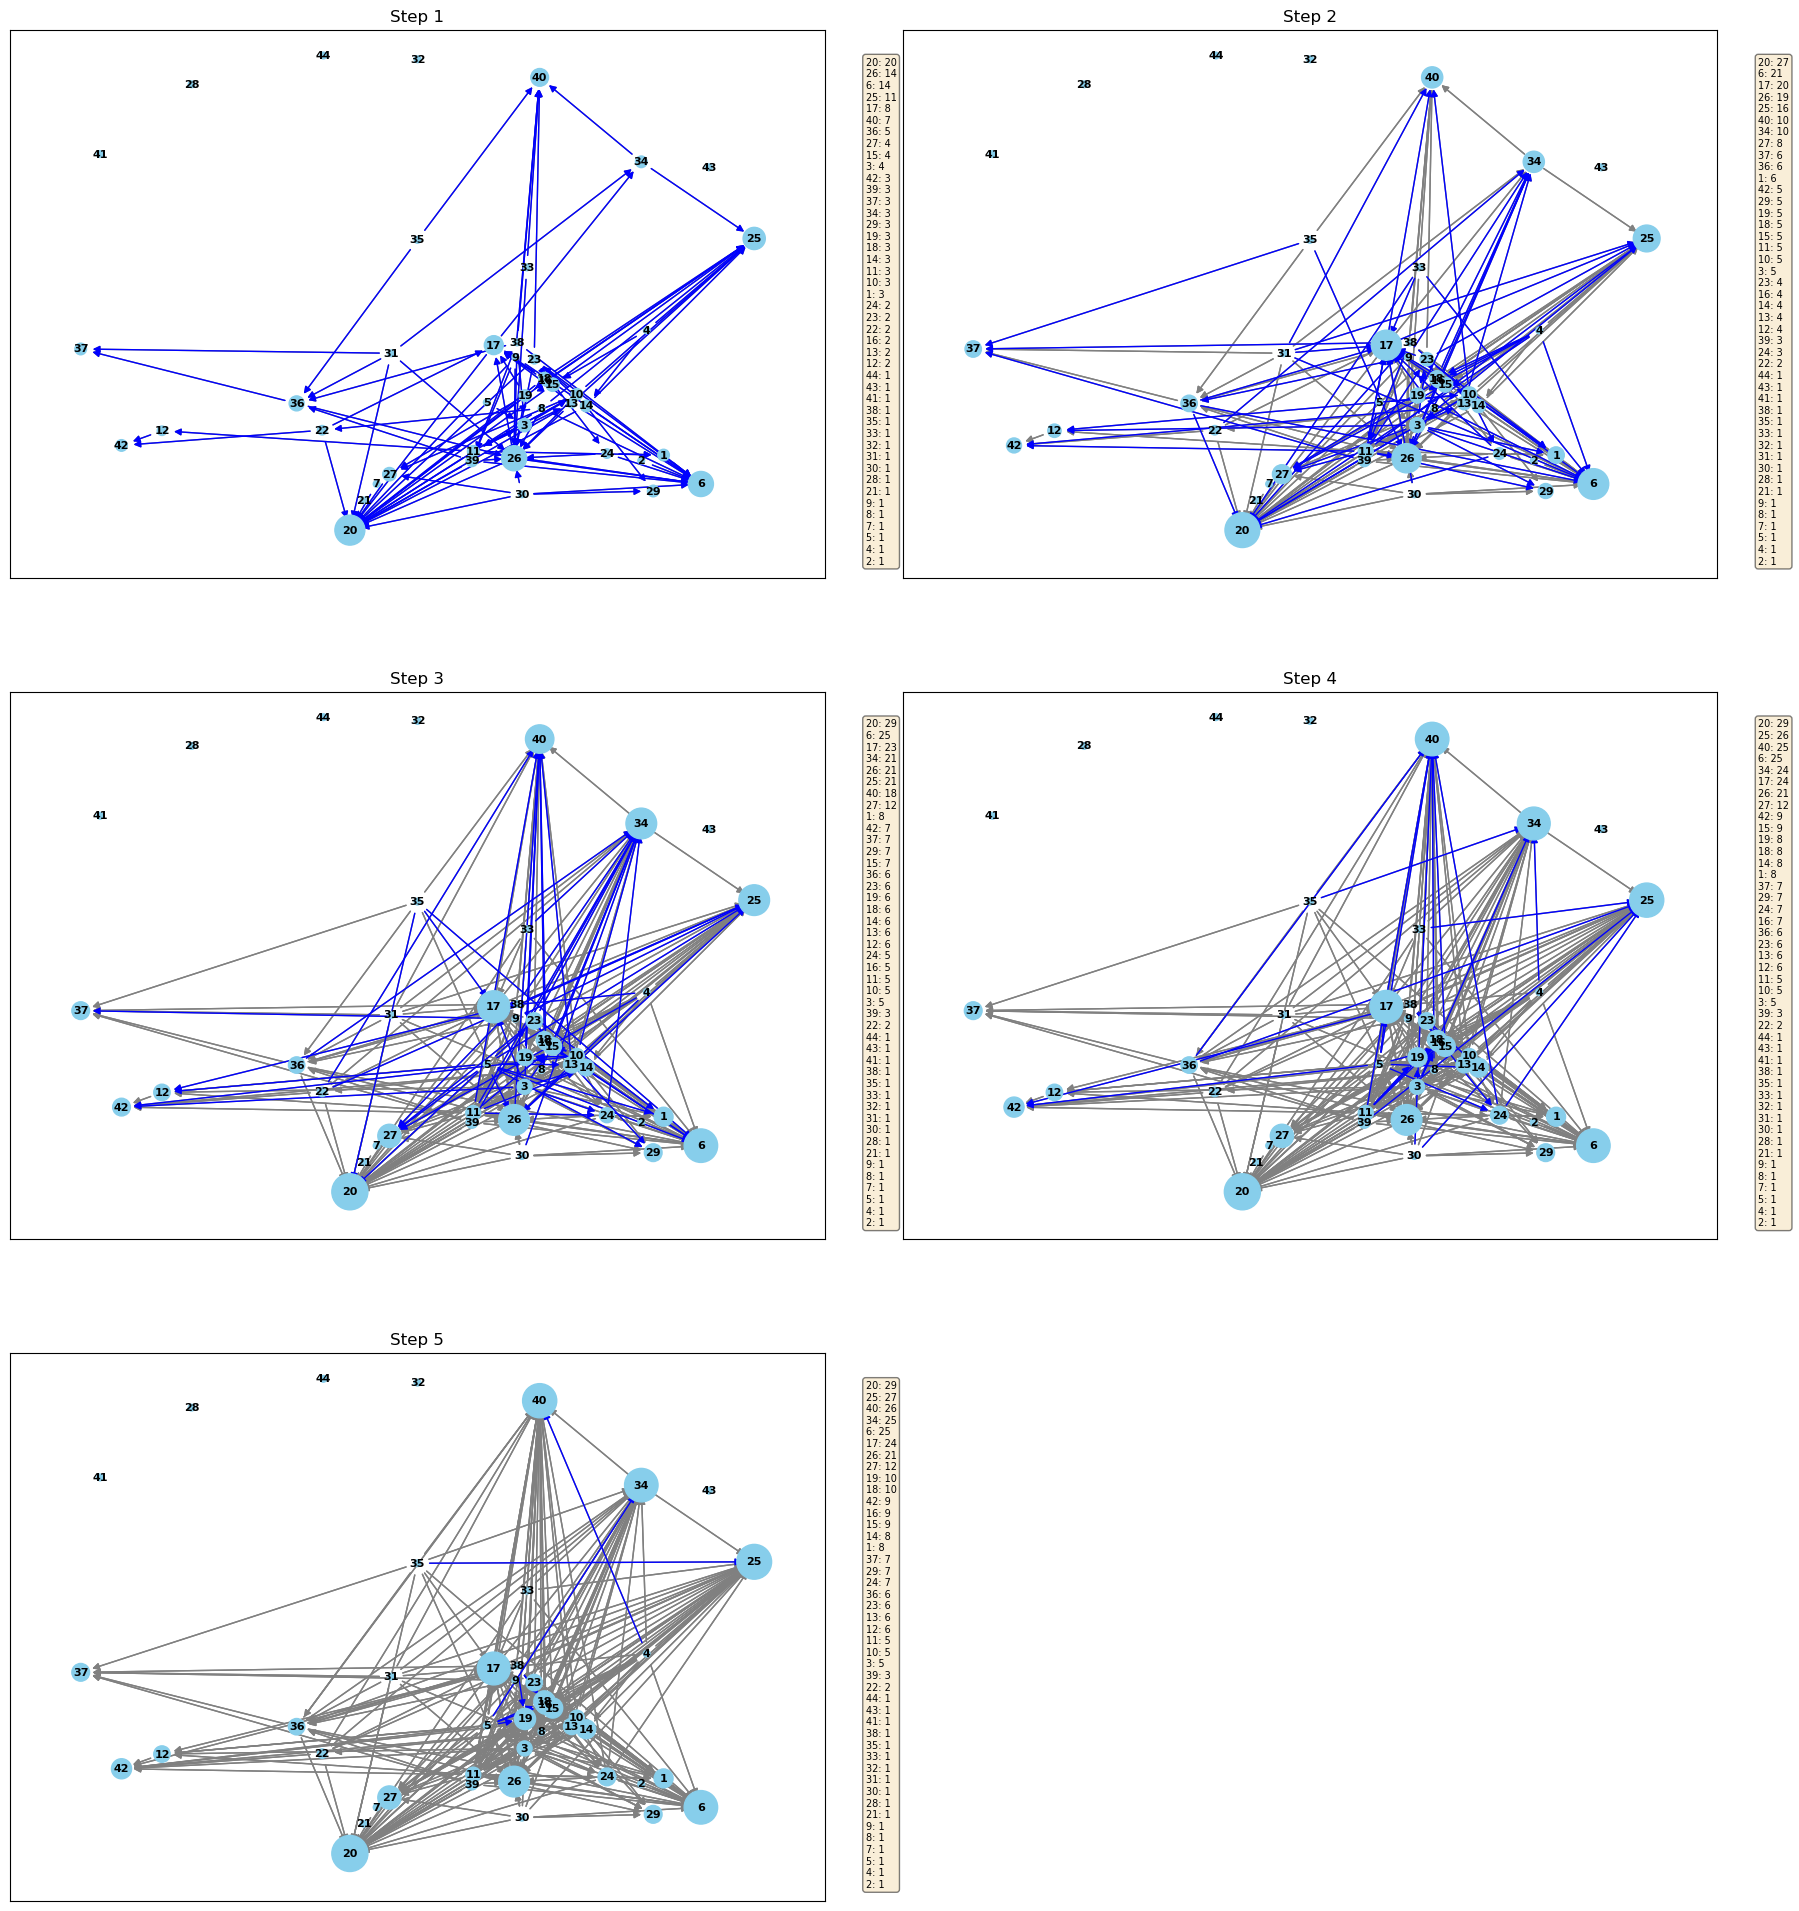

In [21]:
def draw_graphs(graphs):
    # Set up the figure size
    plt.figure(figsize=(18, 20))  # Slightly wider to accommodate the sidebar

    # Plot each graph
    for i, graph in enumerate(graphs, 1):
        ax = plt.subplot(3, 2, i)
        # Calculate fixed positions for all nodes
        pos = nx.spring_layout(graphs[0], seed=42)  # Using the first graph to define initial positions
        
        # Calculate fixed positions for all nodes using Kamada-Kawai layout
        #pos = nx.kamada_kawai_layout(graph)

        # Check for isolated nodes and adjust their positions if necessary
        for node, degree in graph.degree():
            if degree == 0:  # Node is isolated
                pos[node] = (1, 1)  # Move isolated nodes to a visible position

        # Calculate the raw in-degree for each node
        in_degrees = dict(graph.in_degree())
        # Scale the in-degree values for node size: multiply by 100 for visibility (adjust scale as needed)
        node_sizes = [in_degrees[node] * 100 for node in graph.nodes()]
        
        # Calculate the normalized in-degree centrality for each node
        in_degree_centrality = nx.in_degree_centrality(graph)
        # Scale the in-degree values for node size: multiply by 1000 for visibility
        node_sizes2 = [in_degree_centrality[node] * 1000 for node in graph.nodes()]

        # Draw the nodes, with size based on raw in-degree
        nx.draw_networkx_nodes(graph, pos, node_color='skyblue', node_size=node_sizes2)
        
        # Draw the labels
        nx.draw_networkx_labels(graph, pos, font_size=8, font_weight='bold')

        # Draw edges, excluding self-loops, with appropriate styling
        edges = [(u, v) for u, v in graph.edges() if u != v]
        nx.draw_networkx_edges(graph, pos, edgelist=edges, width=1, edge_color='grey', arrowstyle='-|>', arrowsize=10)

        # For edges, we need to determine which are new, and exclude self-loops
        if i > 1:
            # Get the set of edges from the previous graph excluding self-loops
            previous_edges = set((u, v) for u, v in graphs[i-2].edges() if u != v)
            current_edges = set((u, v) for u, v in graph.edges() if u != v)
            new_edges = current_edges - previous_edges
            old_edges = current_edges & previous_edges
            # Draw old edges with grey color
            nx.draw_networkx_edges(graph, pos, edgelist=list(old_edges), width=1, edge_color='grey', arrowstyle='-|>', arrowsize=10)
            # Draw new edges with blue color
            nx.draw_networkx_edges(graph, pos, edgelist=list(new_edges), width=1, edge_color='blue', arrowstyle='-|>', arrowsize=10)
        else:
            # For the first graph, exclude self-loops, and all edges are new
            first_graph_edges = [(u, v) for u, v in graph.edges() if u != v]
            nx.draw_networkx_edges(graph, pos, edgelist=first_graph_edges, edge_color='blue', width=1, arrowstyle='-|>', arrowsize=10)

        # Add a text box with raw in-degree values, sorted in descending order
        sorted_nodes = sorted(in_degrees.items(), key=lambda item: item[1], reverse=True)
        textstr = '\n'.join([f'{node}: {count}' for node, count in sorted_nodes])
        props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
        ax.text(1.05, 0.95, textstr, transform=ax.transAxes, fontsize=7,
                verticalalignment='top', bbox=props)

        plt.title(f'Step {i}')

    plt.tight_layout()
    plt.show()

# Draw the graphs
draw_graphs(graphs)

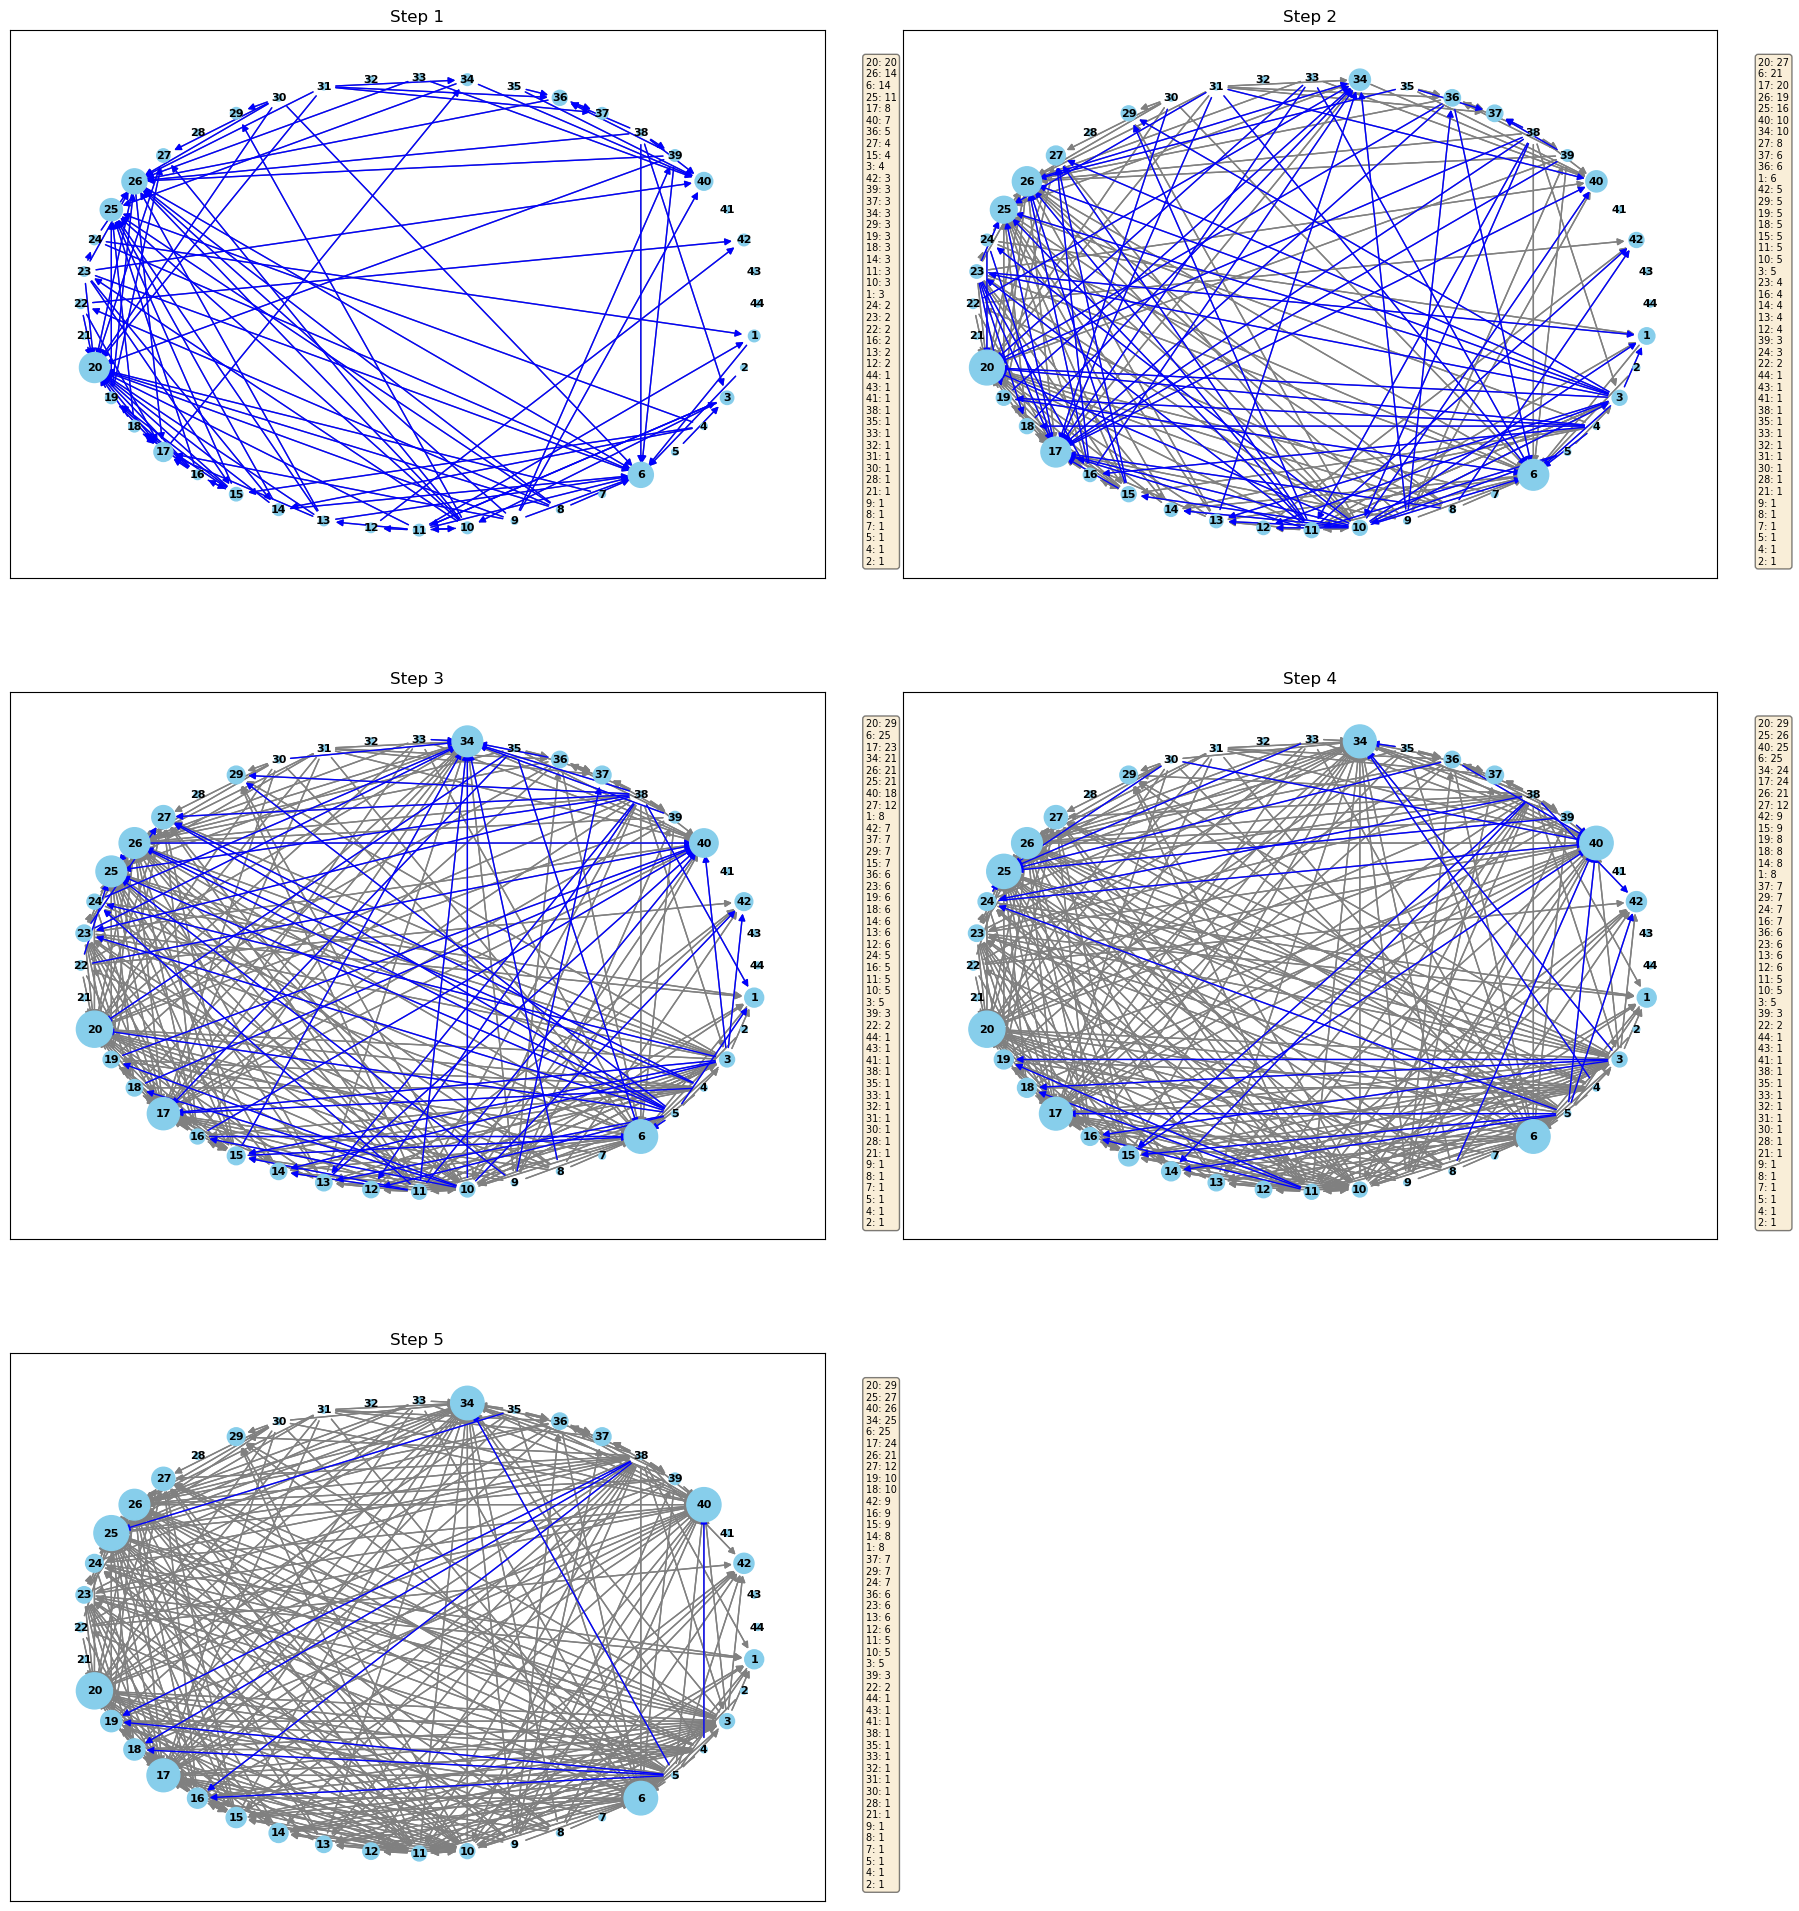

In [23]:
def draw_graphs(graphs):
    # Set up the figure size
    plt.figure(figsize=(18, 20))  # Slightly wider to accommodate the sidebar

    # Plot each graph
    for i, graph in enumerate(graphs, 1):
        ax = plt.subplot(3, 2, i)
        # Calculate fixed positions for all nodes
        pos = nx.circular_layout(graphs[0])  # Use circular layout to maintain consistent positions
        
        # Calculate fixed positions for all nodes using Kamada-Kawai layout
        #pos = nx.kamada_kawai_layout(graph)

        # Check for isolated nodes and adjust their positions if necessary
        for node, degree in graph.degree():
            if degree == 0:  # Node is isolated
                pos[node] = (1, 1)  # Move isolated nodes to a visible position

        # Calculate the raw in-degree for each node
        in_degrees = dict(graph.in_degree())
        # Scale the in-degree values for node size: multiply by 100 for visibility (adjust scale as needed)
        node_sizes = [in_degrees[node] * 100 for node in graph.nodes()]
        
        # Calculate the normalized in-degree centrality for each node
        in_degree_centrality = nx.in_degree_centrality(graph)
        # Scale the in-degree values for node size: multiply by 1000 for visibility
        node_sizes2 = [in_degree_centrality[node] * 1000 for node in graph.nodes()]

        # Draw the nodes, with size based on raw in-degree
        nx.draw_networkx_nodes(graph, pos, node_color='skyblue', node_size=node_sizes2)
        
        # Draw the labels
        nx.draw_networkx_labels(graph, pos, font_size=8, font_weight='bold')

        # Draw edges, excluding self-loops, with appropriate styling
        edges = [(u, v) for u, v in graph.edges() if u != v]
        nx.draw_networkx_edges(graph, pos, edgelist=edges, width=1, edge_color='grey', arrowstyle='-|>', arrowsize=10)

        # For edges, we need to determine which are new, and exclude self-loops
        if i > 1:
            # Get the set of edges from the previous graph excluding self-loops
            previous_edges = set((u, v) for u, v in graphs[i-2].edges() if u != v)
            current_edges = set((u, v) for u, v in graph.edges() if u != v)
            new_edges = current_edges - previous_edges
            old_edges = current_edges & previous_edges
            # Draw old edges with grey color
            nx.draw_networkx_edges(graph, pos, edgelist=list(old_edges), width=1, edge_color='grey', arrowstyle='-|>', arrowsize=10)
            # Draw new edges with blue color
            nx.draw_networkx_edges(graph, pos, edgelist=list(new_edges), width=1, edge_color='blue', arrowstyle='-|>', arrowsize=10)
        else:
            # For the first graph, exclude self-loops, and all edges are new
            first_graph_edges = [(u, v) for u, v in graph.edges() if u != v]
            nx.draw_networkx_edges(graph, pos, edgelist=first_graph_edges, edge_color='blue', width=1, arrowstyle='-|>', arrowsize=10)

        # Add a text box with raw in-degree values, sorted in descending order
        sorted_nodes = sorted(in_degrees.items(), key=lambda item: item[1], reverse=True)
        textstr = '\n'.join([f'{node}: {count}' for node, count in sorted_nodes])
        props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
        ax.text(1.05, 0.95, textstr, transform=ax.transAxes, fontsize=7,
                verticalalignment='top', bbox=props)

        plt.title(f'Step {i}')

    plt.tight_layout()
    plt.show()

# Draw the graphs
draw_graphs(graphs)